In [61]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm, chi2
from sklearn.preprocessing import StandardScaler

In [62]:
N = 2
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media',
        'Time_on_Gaming', 'Time_on_Education']
my_column = cols[N % 7]
print(my_column)

base_dir = pathlib.Path().resolve().parent.parent

df = pd.read_csv(base_dir / 'datasets/teen_phone_addiction_dataset.csv')
print(df.columns)
print(df.head(5))
print(df.describe())

Exercise_Hours
Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')
   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours

In [63]:
# I. Расчет характеристик

exercise_hours_data = df[my_column]

mean_value = exercise_hours_data.mean()
print(f"1. Среднее: {mean_value} часов")

variance = exercise_hours_data.var()
print(f"2. Дисперсия: {variance}")

mode_value = exercise_hours_data.mode()
print(f"3. Мода: {mode_value}")

median_value = exercise_hours_data.median()
print(f"4. Медиана: {median_value:.2f} часов")

quantiles = exercise_hours_data.quantile([0.25, 0.5, 0.75, 0.99])
print("5. Квантили:")
print(f"   - 0.25 (Q1): {quantiles[0.25]} часов")
print(f"   - 0.50 (Q2/Медиана): {quantiles[0.5]} часов")
print(f"   - 0.75 (Q3): {quantiles[0.75]} часов")
print(f"   - 0.99 (Q99): {quantiles[0.99]} часов")

kurtosis = exercise_hours_data.kurtosis()
print(f"6. Эксцесс: {kurtosis}")

skewness = exercise_hours_data.skew()
print(f"7. Асимметрия: {skewness}")

iqr = quantiles[0.75] - quantiles[0.25]
print(f"8. Интерквартильный размах (IQR): {iqr} часов")

1. Среднее: 1.0406666666666666 часов
2. Дисперсия: 0.5396661109258641
3. Мода: 0    0.0
Name: Exercise_Hours, dtype: float64
4. Медиана: 1.00 часов
5. Квантили:
   - 0.25 (Q1): 0.5 часов
   - 0.50 (Q2/Медиана): 1.0 часов
   - 0.75 (Q3): 1.5 часов
   - 0.99 (Q99): 2.9 часов
6. Эксцесс: -0.2574880012747749
7. Асимметрия: 0.43863850250855985
8. Интерквартильный размах (IQR): 1.0 часов


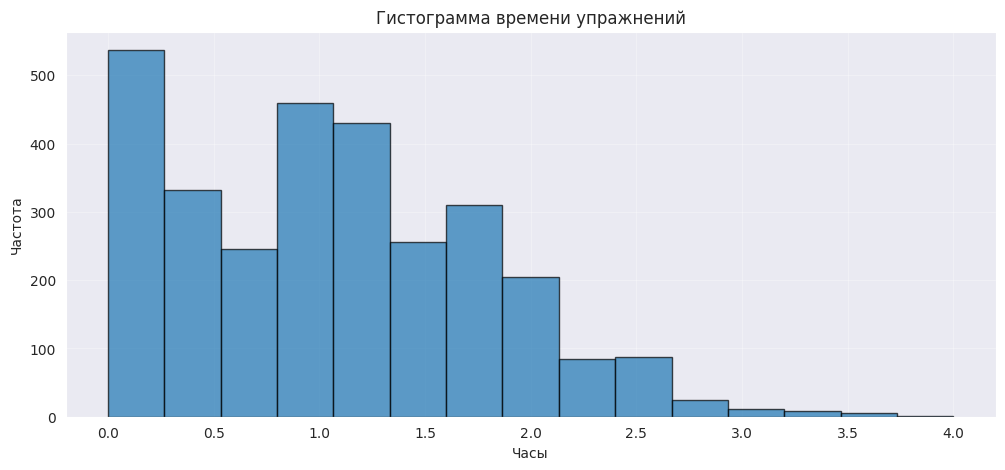

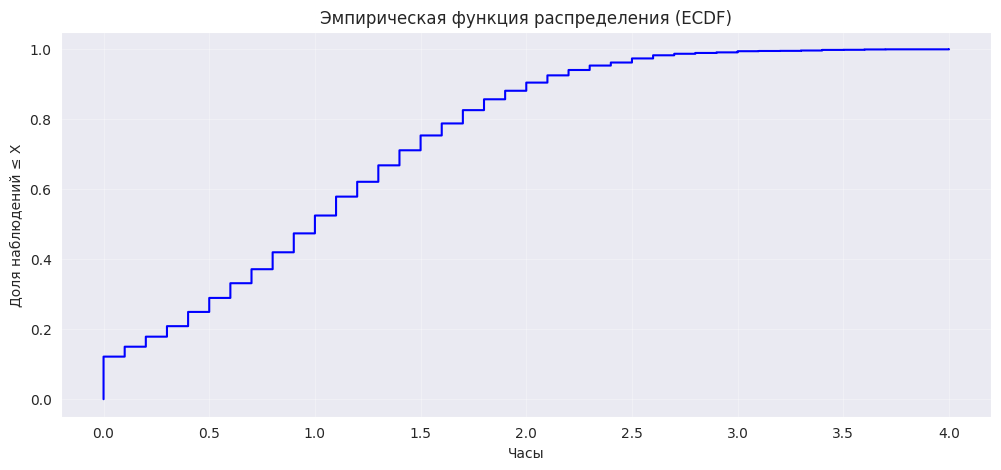

In [64]:
plt.figure(figsize=(12, 5))
plt.hist(exercise_hours_data, bins=15, edgecolor="black", alpha=0.7)
plt.title("Гистограмма времени упражнений")
plt.xlabel("Часы")
plt.ylabel("Частота")
plt.grid(alpha=0.3)
plt.show()

sorted_data = np.sort(exercise_hours_data)
n = len(sorted_data)
y = np.arange(1, n + 1) / n

plt.figure(figsize=(12, 5))
plt.step(sorted_data, y, where="post", color="blue")
plt.title("Эмпирическая функция распределения (ECDF)")
plt.xlabel("Часы")
plt.ylabel("Доля наблюдений ≤ X")
plt.grid(alpha=0.3)
plt.show()

### Выводы о данных:
### Наиболее частое значение — 0 (часть людей вообще не тренируется).
### Типичное значение — около 1 часа (по медиане).
### Большинство данных лежит в диапазоне 0.5–1.5 часов.
### Распределение смещено вправо (есть люди, которые занимаются значительно дольше, чем большинство).
### Разброс не очень большой (дисперсия низкая, IQR всего 1 час).
### Распределение по форме более плоское.

Хи-квадрат статистика: 202.19461622595404
Критическое значение (df=3, α=0.05): 7.814727903251179
Асимметрия: 0.43863850250855985, Z=9.808255091578518
Эксцесс: -0.2574880012747749, Z=-2.8788033712047456


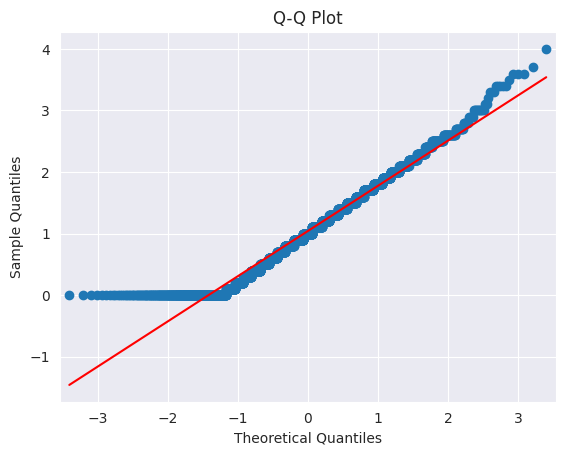

In [65]:
# II. Проверка на нормальность

data = df[my_column].dropna().values
n = len(data)

mean = np.mean(data)
std = np.std(data, ddof=1)

# Хи-квадрат
k = 6
observed, bin_edges = np.histogram(data, bins=k)

expected = []
for i in range(len(bin_edges) - 1):
    p = norm.cdf(bin_edges[i + 1], mean, std) - norm.cdf(bin_edges[i], mean, std)
    expected.append(n * p)

chi_square_stat = np.sum((observed - expected) ** 2 / expected)

df_chi = k - 1 - 2
alpha = 0.05
chi_crit = chi2.ppf(1 - alpha, df_chi)

print("Хи-квадрат статистика:", chi_square_stat)
print(f"Критическое значение (df={df_chi}, α={alpha}):", chi_crit)

# Ассиметрии и эксцесса
Z_skew = skewness / np.sqrt(6 / n)
Z_kurt = kurtosis / np.sqrt(24 / n)
print(f"Асимметрия: {skewness}, Z={Z_skew}")
print(f"Эксцесс: {kurtosis}, Z={Z_kurt}")

# Q-Q plot
sm.qqplot(data, line="s")
plt.title("Q-Q Plot")
plt.show()


### χ² сильно выше критического
### Z_skew > 2
### Q-Q показывает вытянутый правый хвост

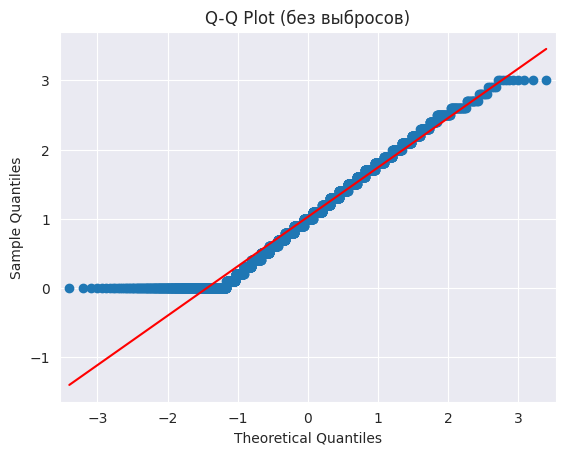

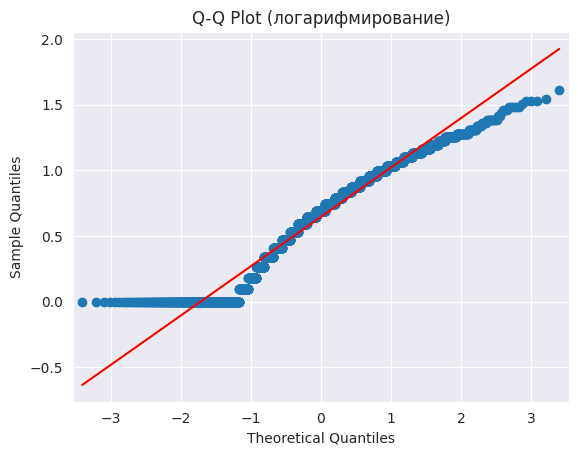

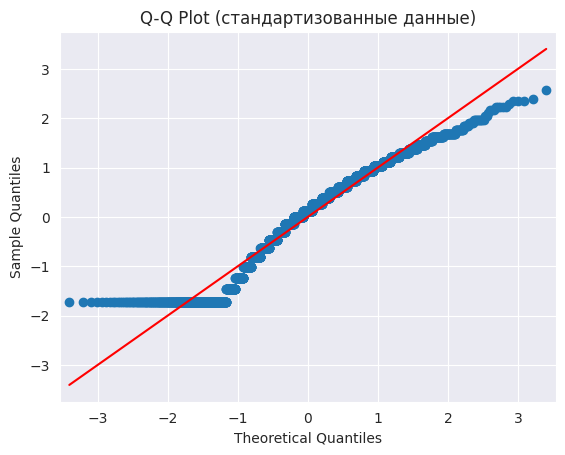

In [68]:
# III. Приведение данных к нормальному распределению

# Удаление выбросов
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_trimmed = data[(data >= lower_bound) & (data <= upper_bound)]

sm.qqplot(data_trimmed, line="s")
plt.title("Q-Q Plot (без выбросов)")
plt.show()

# Логарифмирование
data_log = np.log1p(data)

sm.qqplot(data_log, line="s")
plt.title("Q-Q Plot (логарифмирование)")
plt.show()

# Стандартизация
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_log.reshape(-1, 1)).flatten()

sm.qqplot(data_scaled, line="s")
plt.title("Q-Q Plot (стандартизованные данные)")
plt.show()

Среднее и дисперсия по каждой группе:
                  mean       var
School_Grade                    
10th          1.042505  0.536523
11th          0.979541  0.486652
12th          1.045936  0.564155
7th           1.029577  0.532410
8th           1.062033  0.551674
9th           1.080228  0.561665


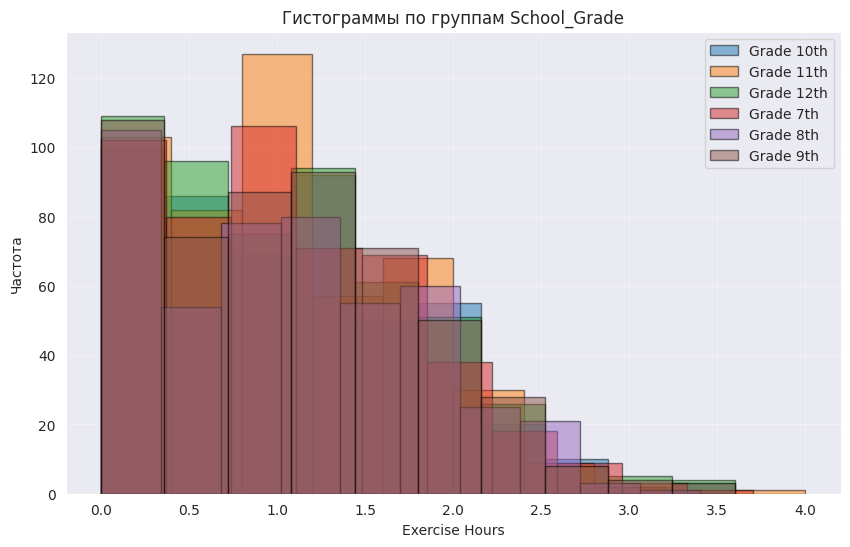

In [69]:
# IV. Группировка по 'School_Grade'

grouped = df.groupby("School_Grade")[my_column]

stats_by_group = grouped.agg(["mean", "var"])
print("Среднее и дисперсия по каждой группе:")
print(stats_by_group)

plt.figure(figsize=(10, 6))

for grade, values in grouped:
    plt.hist(values, bins=10, alpha=0.5, edgecolor="black", label=f"Grade {grade}")

plt.xlabel("Exercise Hours")
plt.ylabel("Частота")
plt.title("Гистограммы по группам School_Grade")
plt.legend()
plt.grid(alpha=0.3)
plt.show()